In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, r2_score, plot_confusion_matrix, accuracy_score

In [3]:
Train_Set = pd.read_csv("/home/tintin/Study/Data-Science/Statistical-Machine-Learning/Learn-Random-Forest-Regression/Datasets/Position_SalariesTrain.csv")
Test_Set = pd.read_csv("/home/tintin/Study/Data-Science/Statistical-Machine-Learning/Learn-Random-Forest-Regression/Datasets/Position_SalariesTest.csv")

In [4]:
X_train = Train_Set.iloc[:, 1:-1].values
Y_train = Train_Set.iloc[:, -1].values.reshape(-1,1)
X_test = Test_Set.iloc[:, 1:-1].values
Y_test = Test_Set.iloc[:, -1].values.reshape(-1,1)


In [5]:
print(X_train.shape)
print(X_test.shape)

(7, 1)
(3, 1)


In [6]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10)
regressor.fit(X_train, Y_train)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

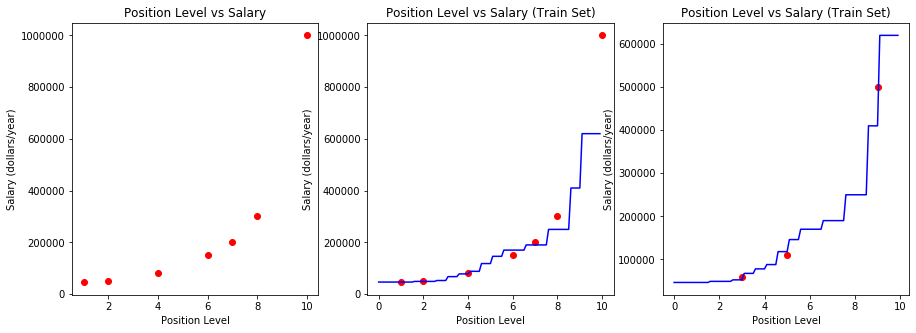

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)

plt.scatter(X_train, Y_train, color = "red")
plt.title("Position Level vs Salary")
plt.xlabel("Position Level")
plt.ylabel("Salary (dollars/year)")

plt.subplot(1,3,2)
X_dummy = np.arange(0, 10, 0.1).reshape(-1, 1)
Y_dummy_pred = regressor.predict(X_dummy)
plt.scatter(X_train, Y_train, color = "red")
plt.plot(X_dummy, Y_dummy_pred, color = "blue")
plt.title("Position Level vs Salary (Train Set)")
plt.xlabel("Position Level")
plt.ylabel("Salary (dollars/year)")

plt.subplot(1,3,3)
X_dummy = np.arange(0, 10, 0.1).reshape(-1, 1)
Y_dummy_pred = regressor.predict(X_dummy)
plt.scatter(X_test, Y_test, color = "red")
plt.plot(X_dummy, Y_dummy_pred, color = "blue")
plt.title("Position Level vs Salary (Train Set)")
plt.xlabel("Position Level")
plt.ylabel("Salary (dollars/year)")

plt.show()

In [8]:
# Evaluate model
print(accuracy_score(regressor.predict(X_train), Y_train))
print(accuracy_score(regressor.predict(X_test), Y_test))

print(r2_score(Y_train,regressor.predict(X_train)))
print(r2_score(Y_test,regressor.predict(X_test)))

0.0
0.0
0.7856273177724454
0.9291764790350373


In [9]:
def compare(i_example, X, Y):
    x = X[i_example : i_example + 1]
    y = Y[i_example]
    y_pred = regressor.predict(x)
    print(x, y, y_pred)

In [10]:
for i in range(len(X_test)):
    compare(i, X_test, Y_test)

[[9]] [500000] [410000.]
[[3]] [60000] [52500.]
[[5]] [110000] [118000.]
